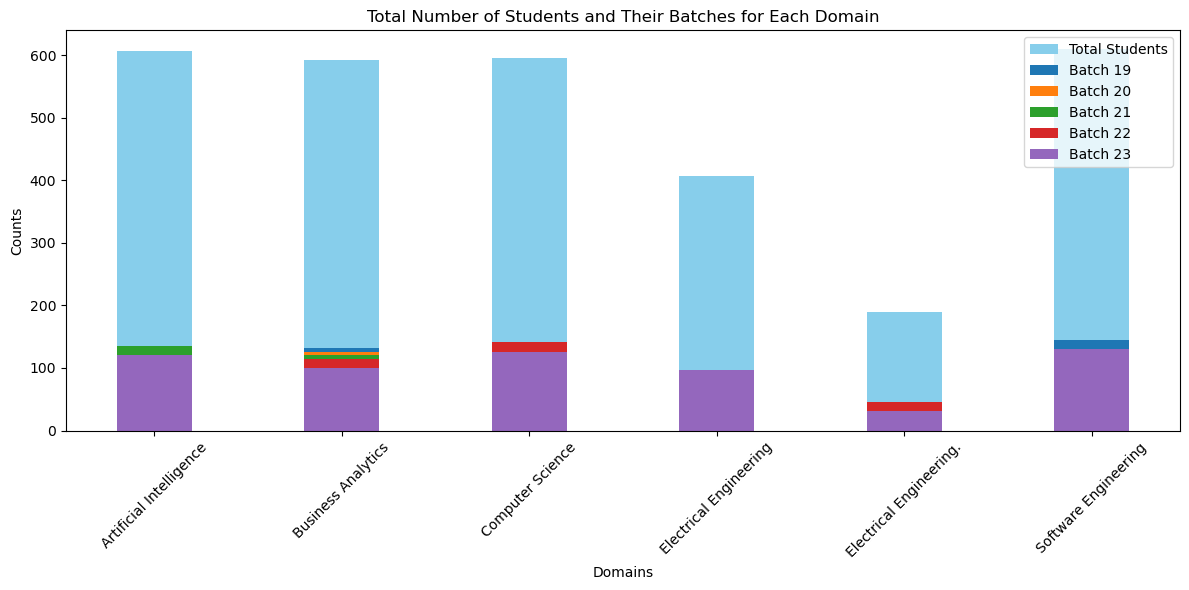

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = r'C:\Users\Lenovo\Desktop\AI LAB\smester_project\Q3\Data.csv'
data = pd.read_csv(file_path)

# Group by domain and batch, then count the number of students in each group
grouped_data = data.groupby(['domain', 'batch']).size().unstack(fill_value=0)

# Plotting the grouped bar plot
plt.figure(figsize=(12, 6))

# Plotting total students for each domain
x = range(len(grouped_data))
plt.bar(x, grouped_data.sum(axis=1), width=0.4, label='Total Students', color='skyblue')

# Plotting batches for each domain
for i, batch in enumerate(grouped_data.columns):
    plt.bar(x, grouped_data[batch], width=0.4, label=f'Batch {batch}', color=plt.cm.tab10(i))

plt.xlabel('Domains')
plt.ylabel('Counts')
plt.title('Total Number of Students and Their Batches for Each Domain')
plt.xticks(ticks=x, labels=grouped_data.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


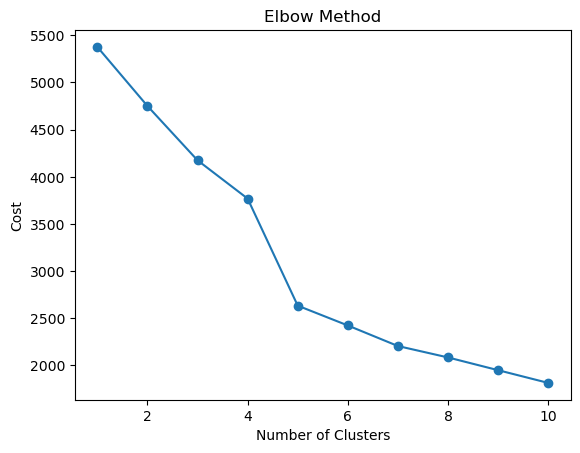

        id first_name    last_name                      email  gender  \
0        1       Bryn        Isard      bisard0@posterous.com  Female   
1        2    Lynette     Ashbrook       lashbrook1@wiley.com  Female   
2        3    Gardner    Beardwood     gbeardwood2@seesaa.net    Male   
3        4        Ros   Marguerite  rmarguerite3@e-recht24.de  Female   
4        5      Terry        Oswal            toswal4@icq.com  Female   
...    ...        ...          ...                        ...     ...   
2995   996   Brittany       Cordel  bcordelrn@paginegialle.it  Female   
2996   997   Cristian     Ghiroldi     cghiroldiro@unicef.org    Male   
2997   998   Angelica  Blenkinsopp    ablenkinsopprp@ox.ac.uk  Female   
2998   999     Crosby      Bagnold        cbagnoldrq@ucoz.com    Male   
2999  1000     Agathe      Kasting           akastingrr@51.la  Female   

                       domain  batch  cluster  
0          Business Analytics     22        4  
1        Software Engineeri

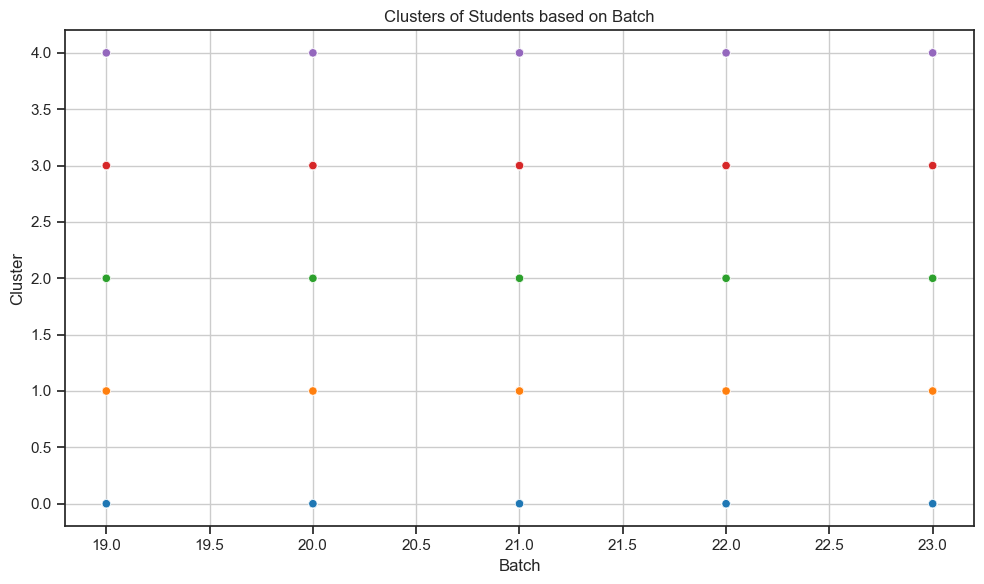

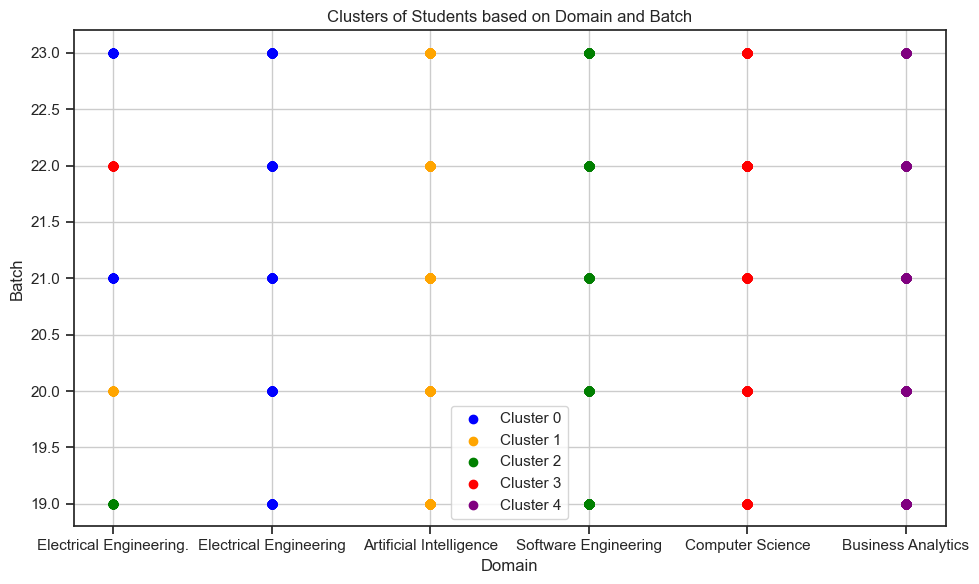

In [2]:
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt


file_path = r'C:\Users\Lenovo\Desktop\AI LAB\smester_project\Q3\MOCK_DATA.csv'
data = pd.read_csv(file_path)


# encode featured varriables 
encoded_data = pd.get_dummies(data[['domain', 'batch']])


# We'll use the elbow method to find the optimal number of clusters
cost = []
for num_clusters in range(1, 11):
    kmode = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=0)
    kmode.fit_predict(encoded_data)
    cost.append(kmode.cost_)

plt.plot(range(1, 11), cost, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()

# Based on the elbow method, select the optimal number of clusters
optimal_num_clusters = 5  
kmode = KModes(n_clusters=optimal_num_clusters, init='Huang', n_init=5, verbose=0)
clusters = kmode.fit_predict(encoded_data)

# Printing the clusters and assigned labels
data['cluster'] = clusters
print(data[['id',	'first_name'	,'last_name',	'email',	'gender','domain', 'batch', 'cluster']])

import seaborn as sns


sns.set(style="ticks")

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['batch'], y=data['cluster'], hue=data['cluster'], palette="tab10", legend=False)
plt.xlabel('Batch')
plt.ylabel('Cluster')
plt.title('Clusters of Students based on Batch')
plt.grid(True)
plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt

# Define colors for each cluster
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plotting the scatter plot
plt.figure(figsize=(10, 6))

for cluster_num, cluster_data in data.groupby('cluster'):
    plt.scatter(cluster_data['domain'], cluster_data['batch'], color=colors[cluster_num], label=f'Cluster {cluster_num}')

plt.xlabel('Domain')
plt.ylabel('Batch')
plt.title('Clusters of Students based on Domain and Batch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
cluster_counts = {}
for cluster in set(clusters):
    cluster_counts[cluster] = sum(clusters == cluster)
data['cluster'] = clusters
# Print the total number of students in each cluster
print("Total Number of Students in Each Cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster + 1}: {count} students")

Total Number of Students in Each Cluster:
Cluster 1: 479 students
Cluster 2: 644 students
Cluster 3: 643 students
Cluster 4: 642 students
Cluster 5: 592 students


As due to large number of data points we can't visualize it properly using the scatter plot 
Thats why we are using histogram to visualize the count of studenst or data in each cluster

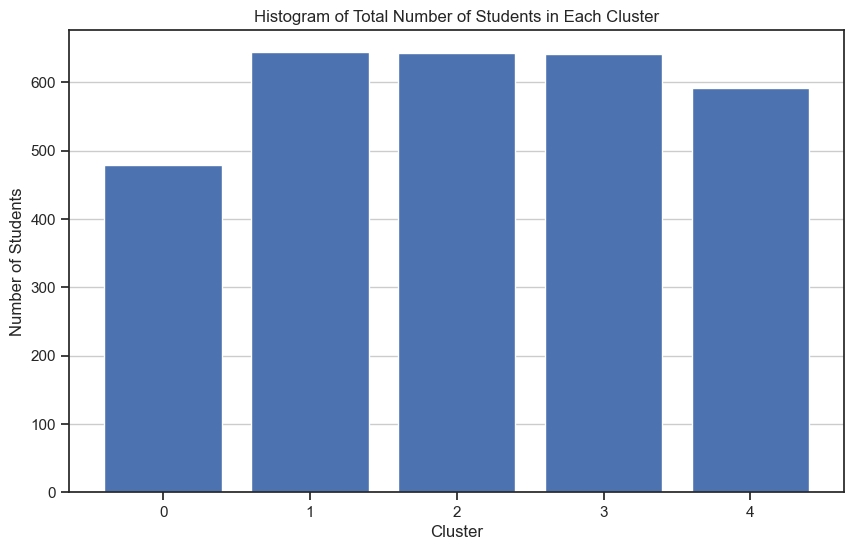

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(clusters, bins=range(optimal_num_clusters + 1), align='left', rwidth=0.8)
plt.title('Histogram of Total Number of Students in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Students')
plt.xticks(range(optimal_num_clusters))
plt.grid(axis='y')
plt.show()

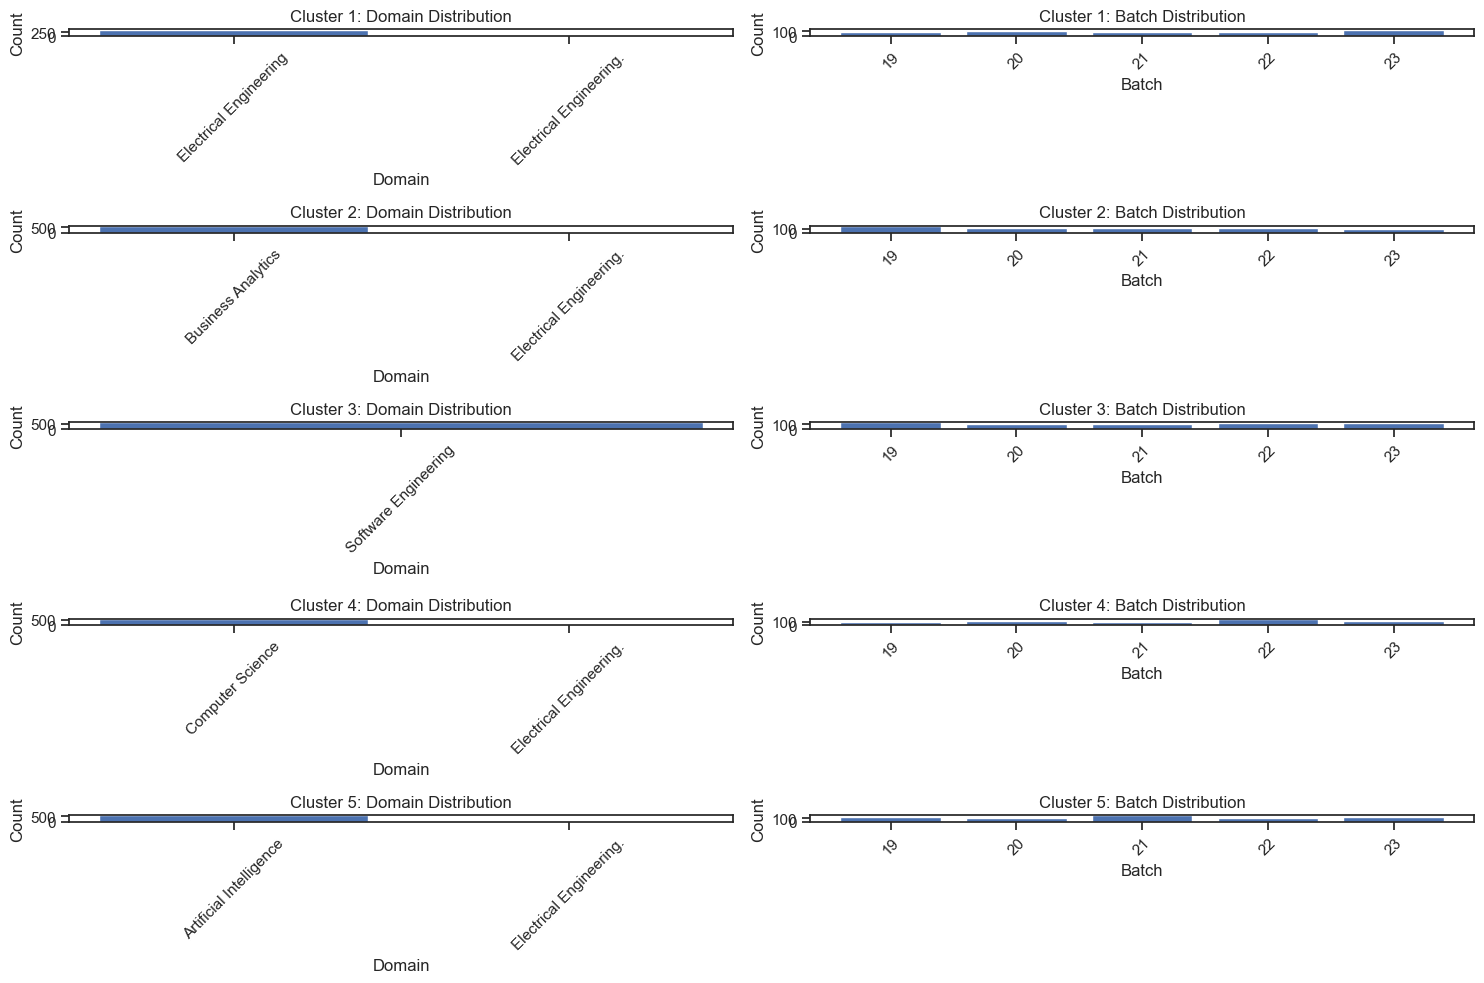

In [5]:
optimal_num_clusters = 5  
kmode = KModes(n_clusters=optimal_num_clusters, init='Huang', n_init=5, verbose=0)
clusters = kmode.fit_predict(encoded_data)
data['cluster'] = clusters
# Visualizing clusters
fig, axs = plt.subplots(optimal_num_clusters, 2, figsize=(15, 10))


for cluster_num in range(optimal_num_clusters):
    # Select data points belonging to the current cluster
    cluster_data = data[data['cluster'] == cluster_num]
    
    # Plot domain distribution within the cluster
    domain_counts = cluster_data['domain'].value_counts()
    axs[cluster_num, 0].bar(domain_counts.index, domain_counts.values)
    axs[cluster_num, 0].set_title(f'Cluster {cluster_num+1}: Domain Distribution')
    axs[cluster_num, 0].set_xlabel('Domain')
    axs[cluster_num, 0].set_ylabel('Count')
    axs[cluster_num, 0].tick_params(axis='x', rotation=45)
    
    # Plot batch distribution within the cluster
    batch_counts = cluster_data['batch'].value_counts()
    axs[cluster_num, 1].bar(batch_counts.index, batch_counts.values)
    axs[cluster_num, 1].set_title(f'Cluster {cluster_num+1}: Batch Distribution')
    axs[cluster_num, 1].set_xlabel('Batch')
    axs[cluster_num, 1].set_ylabel('Count')
    axs[cluster_num, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


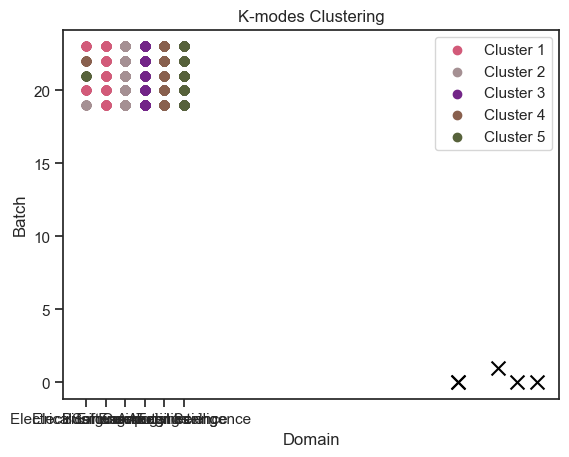

In [6]:
import numpy as np


colors = np.random.rand(optimal_num_clusters, 3)


for cluster_num in range(optimal_num_clusters):
    
    cluster_data = data[data['cluster'] == cluster_num]
    
    # Plotting data points within the cluster
    plt.scatter(cluster_data['domain'], cluster_data['batch'], color=colors[cluster_num], label=f'Cluster {cluster_num+1}')

# Plotting centroids
centroids = kmode.cluster_centroids_
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], marker='x', color='black', s=100)  # Assuming only two features (domain and batch)

plt.xlabel('Domain')
plt.ylabel('Batch')
plt.title('K-modes Clustering')
plt.legend()
plt.show()


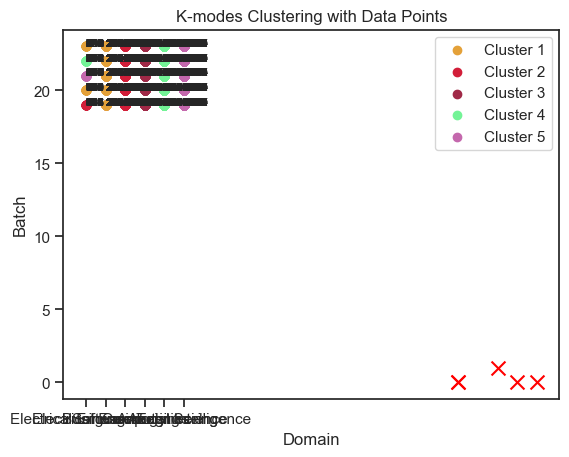

In [7]:
import numpy as np

colors = np.random.rand(optimal_num_clusters, 3)

# Plotting the clusters
for cluster_num in range(optimal_num_clusters):
    # Select data points belonging to the current cluster
    cluster_data = data[data['cluster'] == cluster_num]
    
    # Plotting data points within the cluster
    plt.scatter(cluster_data['domain'], cluster_data['batch'], color=colors[cluster_num], label=f'Cluster {cluster_num+1}')

    # Annotating data points within the cluster
    for index, point in cluster_data.iterrows():
        plt.text(point['domain'], point['batch'], str(index), fontsize=8)

# Plotting centroids
centroids = kmode.cluster_centroids_
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], marker='x', color='red', s=100)  # Assuming only two features (domain and batch)

plt.xlabel('Domain')
plt.ylabel('Batch')
plt.title('K-modes Clustering with Data Points')
plt.legend()
plt.show()


In [8]:
# Print data within each cluster
for cluster_num in range(optimal_num_clusters):
    print(f"Cluster {cluster_num+1}:")
    cluster_data = data[data['cluster'] == cluster_num]
    print(cluster_data[['domain', 'batch']])
    print("\n")


Cluster 1:
                       domain  batch
10    Electrical Engineering.     20
11    Electrical Engineering.     20
58    Electrical Engineering.     20
75    Electrical Engineering.     23
89    Electrical Engineering.     23
...                       ...    ...
2979   Electrical Engineering     22
2980   Electrical Engineering     20
2991   Electrical Engineering     23
2993   Electrical Engineering     23
2997   Electrical Engineering     22

[476 rows x 2 columns]


Cluster 2:
                  domain  batch
0     Business Analytics     22
15    Business Analytics     21
16    Business Analytics     21
21    Business Analytics     21
26    Business Analytics     19
...                  ...    ...
2956  Business Analytics     21
2965  Business Analytics     20
2966  Business Analytics     23
2973  Business Analytics     21
2998  Business Analytics     20

[626 rows x 2 columns]


Cluster 3:
                    domain  batch
1     Software Engineering     19
3     Software Engi

In [9]:
import random

def allocate_students_to_rooms(data, room_capacities):
    allocated_rooms = []
    remaining_students = data.copy()

    for room_capacity in room_capacities:
        room_capacity_left = room_capacity
        room_students = []

        while room_capacity_left > 0 and len(remaining_students) > 0:
            # Get the first student from the remaining list
            student = remaining_students.iloc[0]
            remaining_students = remaining_students.iloc[1:]

            # Check if adding the student exceeds the room capacity
            if room_capacity_left >= 1:
                room_students.append(student.name)
                room_capacity_left -= 1

        allocated_rooms.append(room_students)

    return allocated_rooms

# Define room capacities based on the provided distribution
room_capacities = [random.randint(30, 35) for _ in range(25)]  # 25 rooms with capacity between 30 and 35
room_capacities.extend([30] * 6)  # 6 rooms with capacity exactly 30
room_capacities.extend([25] * 3)  # 3 rooms with capacity exactly 25

# Allocate students to rooms
allocated_rooms = allocate_students_to_rooms(data, room_capacities)

# Print allocated rooms
for i, room_students in enumerate(allocated_rooms):
    print(f"Room {i+1} (Capacity: {room_capacities[i]}):")
    print(data.loc[room_students, ['domain', 'batch']])
    print()


Room 1 (Capacity: 31):
                     domain  batch
0        Business Analytics     22
1      Software Engineering     19
2   Electrical Engineering.     21
3      Software Engineering     23
4   Electrical Engineering.     21
5   Electrical Engineering.     21
6   Electrical Engineering.     22
7   Artificial Intelligence     23
8   Artificial Intelligence     19
9          Computer Science     22
10  Electrical Engineering.     20
11  Electrical Engineering.     20
12     Software Engineering     22
13  Electrical Engineering.     21
14         Computer Science     22
15       Business Analytics     21
16       Business Analytics     21
17         Computer Science     22
18     Software Engineering     22
19     Software Engineering     23
20  Electrical Engineering.     22
21       Business Analytics     21
22  Artificial Intelligence     22
23  Artificial Intelligence     20
24  Artificial Intelligence     20
25         Computer Science     20
26       Business Analytics     

In [10]:

import random

def allocate_students_to_rooms(data, room_capacities, clusters):
    allocated_rooms = [[] for _ in range(len(room_capacities))]  # Initialize rooms
    not_allocated_c=0
    not_allocated=0
    
    for cluster_num in range(max(clusters) + 1):
        cluster_students = data[clusters == cluster_num]

        for student_index, student in cluster_students.iterrows():
            allocated = False
            for room_idx, room_capacity in enumerate(room_capacities):
                if len(allocated_rooms[room_idx]) < room_capacity:
                    allocated_rooms[room_idx].append(student_index)
                    allocated = True
                    break
            if not allocated:
                print(f"Student {student_index} from cluster {cluster_num} could not be allocated to any room.")
                
                not_allocated_c=not_allocated_c+1

    print("Left without allocation: ",not_allocated)
    return allocated_rooms,not_allocated_c

# Define room capacities based on the provided distribution
room_capacities = [random.randint(34, 35) for _ in range(25)]  # 25 rooms with capacity between 30 and 35
room_capacities.extend([30] * 6)  # 6 rooms with capacity exactly 30
room_capacities.extend([25] * 4)  # 3 rooms with capacity exactly 25



# Allocate students to rooms
allocated_rooms,not_allocated_c = allocate_students_to_rooms(data, room_capacities, clusters)

for i, room_students in enumerate(allocated_rooms):
    print(f"Room {i+1} (Capacity: {room_capacities[i]}):")
    print(data.loc[room_students, ['domain', 'batch']])
    print()

total_students_seated = sum(len(room_students) for room_students in allocated_rooms)
print(f"Total number of students seated in rooms: {total_students_seated}")

total_students_seated = sum(len(room_students) for room_students in allocated_rooms)
print(f"Total number of students seated in rooms: {total_students_seated}")
print("Left without allocation: ",not_allocated_c)

Student 193 from cluster 2 could not be allocated to any room.
Student 197 from cluster 2 could not be allocated to any room.
Student 198 from cluster 2 could not be allocated to any room.
Student 203 from cluster 2 could not be allocated to any room.
Student 209 from cluster 2 could not be allocated to any room.
Student 219 from cluster 2 could not be allocated to any room.
Student 226 from cluster 2 could not be allocated to any room.
Student 231 from cluster 2 could not be allocated to any room.
Student 233 from cluster 2 could not be allocated to any room.
Student 236 from cluster 2 could not be allocated to any room.
Student 241 from cluster 2 could not be allocated to any room.
Student 245 from cluster 2 could not be allocated to any room.
Student 247 from cluster 2 could not be allocated to any room.
Student 255 from cluster 2 could not be allocated to any room.
Student 256 from cluster 2 could not be allocated to any room.
Student 261 from cluster 2 could not be allocated to an

In [11]:
import math

def calculate_slots(data, room_capacities):
    total_students = len(data)
    total_capacity = sum(room_capacities)
    total_slots = math.ceil(total_students / total_capacity)
    return total_slots

# Calculate the number of slots
total_slots = calculate_slots(data, room_capacities)
print("Total slots needed:", total_slots)


Total slots needed: 3


In [12]:
import pandas as pd
import numpy as np
import random

def allocate_students_to_rooms(data, room_capacities, clusters):
    total_rooms = len(room_capacities)
    allocated_rooms = [[[] for _ in range(3)] for _ in range(total_rooms)]  # 3 slots per room
    slots = 3  # Number of slots
    not_allocated = 0

    for cluster_num in range(max(clusters) + 1):
        cluster_students = data[clusters == cluster_num]

        for student_index, student in cluster_students.iterrows():
            allocated = False
            for slot in range(slots):
                for room_idx, room_capacity in enumerate(room_capacities):
                    if len(allocated_rooms[room_idx][slot]) < room_capacity:
                        allocated_rooms[room_idx][slot].append(student_index)
                        allocated = True
                        break
                if allocated:
                    break
            if not allocated:
                print(f"Student {student_index} from cluster {cluster_num} could not be allocated to any room.")
                not_allocated += 1

    print("Left without allocation: ", not_allocated)
    return allocated_rooms, not_allocated


room_capacities = [random.randint(34, 35) for _ in range(25)]  # 25 rooms with capacity between 34 and 35
room_capacities.extend([30] * 6)  # 6 rooms with capacity exactly 30
room_capacities.extend([25] * 4)  # 4 rooms with capacity exactly 25

allocated_rooms, not_allocated = allocate_students_to_rooms(data, room_capacities, clusters)


for i, room_slots in enumerate(allocated_rooms):
    for slot_idx, room_students in enumerate(room_slots):
        print(f"Room {i+1}, Slot {slot_idx+1} (Capacity: {room_capacities[i]}):")
        print(data.loc[room_students, ['domain', 'batch']])
        print()

total_students_seated = sum(len(room_students) for room_slots in allocated_rooms for room_students in room_slots)
print(f"Total number of students seated in rooms: {total_students_seated}")
print("Left without allocation: ", not_allocated)


Left without allocation:  0
Room 1, Slot 1 (Capacity: 35):
                      domain  batch
10   Electrical Engineering.     20
11   Electrical Engineering.     20
58   Electrical Engineering.     20
75   Electrical Engineering.     23
89   Electrical Engineering.     23
91   Electrical Engineering.     20
95   Electrical Engineering.     20
122  Electrical Engineering.     20
132  Electrical Engineering.     23
143  Electrical Engineering.     20
144  Electrical Engineering.     23
167  Electrical Engineering.     23
177  Electrical Engineering.     20
196  Electrical Engineering.     23
235  Electrical Engineering.     23
237  Electrical Engineering.     23
257  Electrical Engineering.     23
264  Electrical Engineering.     20
269  Electrical Engineering.     23
272  Electrical Engineering.     23
305  Electrical Engineering.     20
333  Electrical Engineering.     23
361  Electrical Engineering.     20
362  Electrical Engineering.     20
366  Electrical Engineering.     20
371  

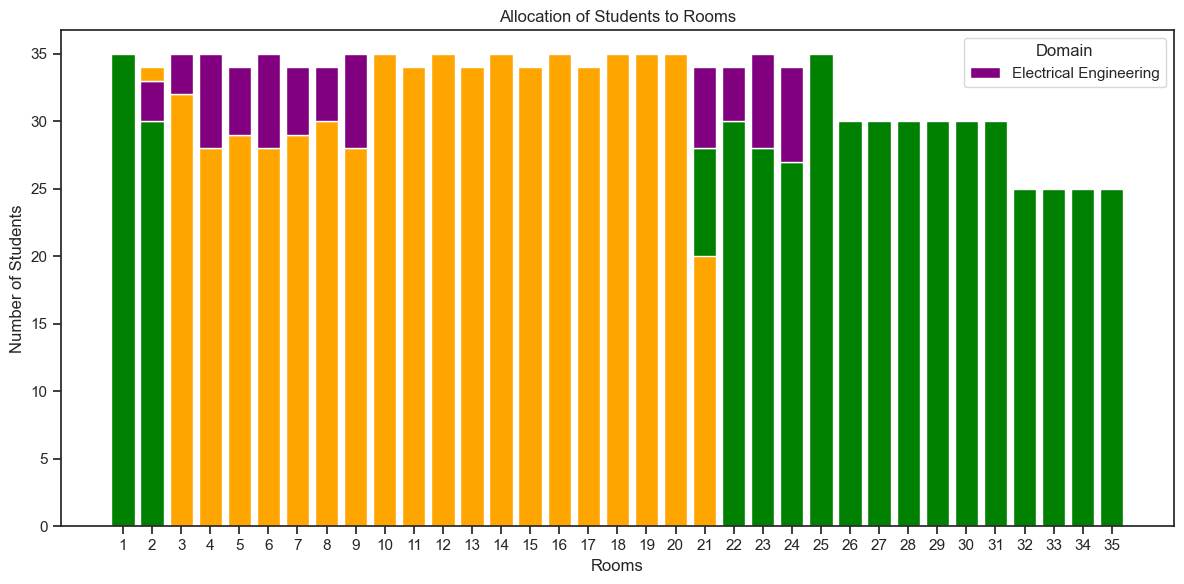

In [13]:
import matplotlib.pyplot as plt

# Remove trailing periods from domain names
data['domain'] = data['domain'].str.rstrip('.')


domain_colors = {
    'Software Engineering': 'skyblue',
    'Artificial Intelligence': 'orange',
    'Computer Science': 'green',
    'Business Analytics': 'red',
    'Electrical Engineering': 'purple'
}

# Plotting the bar plot
plt.figure(figsize=(12, 6))

for i, room_slots in enumerate(allocated_rooms):
    for slot_idx, room_students in enumerate(room_slots):
        domain_counts = data.loc[room_students, 'domain'].value_counts()
        bottom = 0
        for domain, count in domain_counts.items():
            plt.bar(i + 1, count, bottom=bottom, color=domain_colors[domain], label=domain if (i == 0 and slot_idx == 0) else None)
            bottom += count

plt.xlabel('Rooms')
plt.ylabel('Number of Students')
plt.title('Allocation of Students to Rooms')
plt.legend(title='Domain', loc='upper right')
plt.xticks(range(1, len(room_capacities) + 1))
plt.tight_layout()
plt.show()


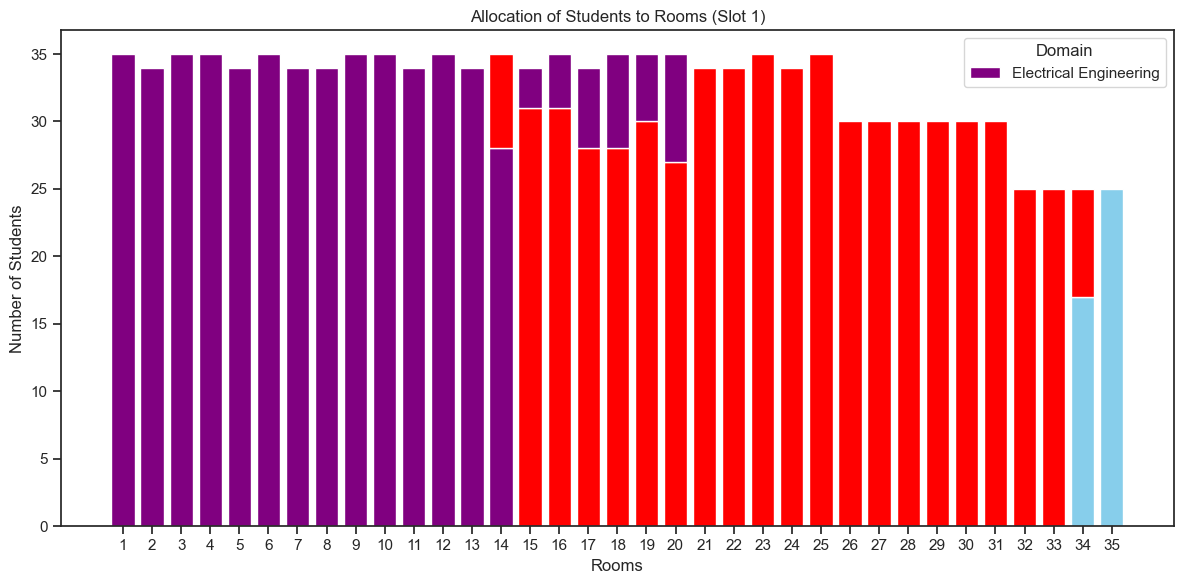

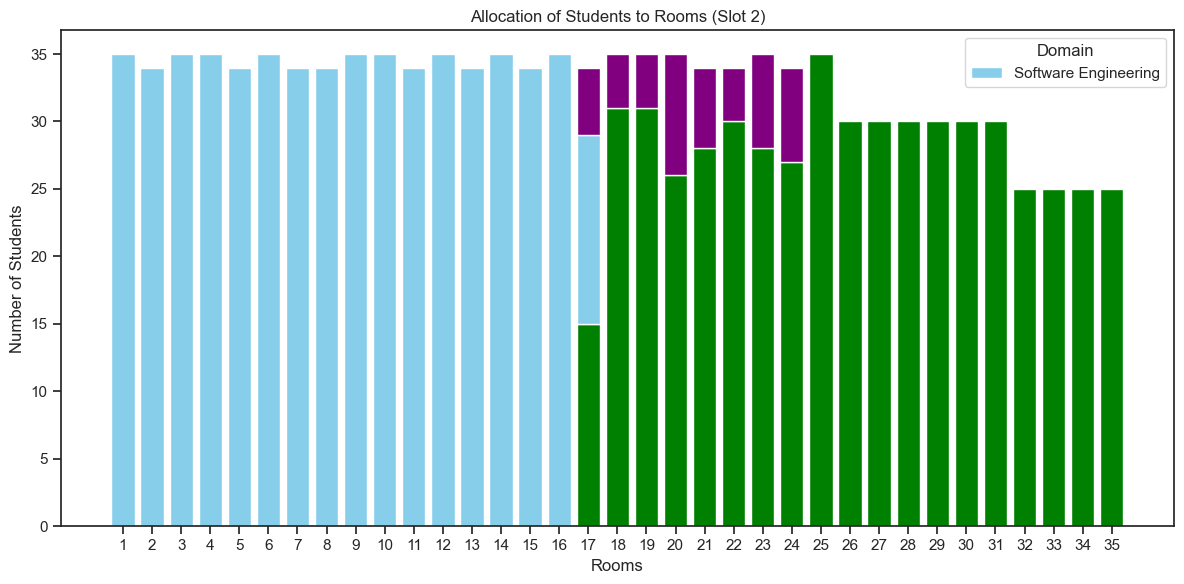

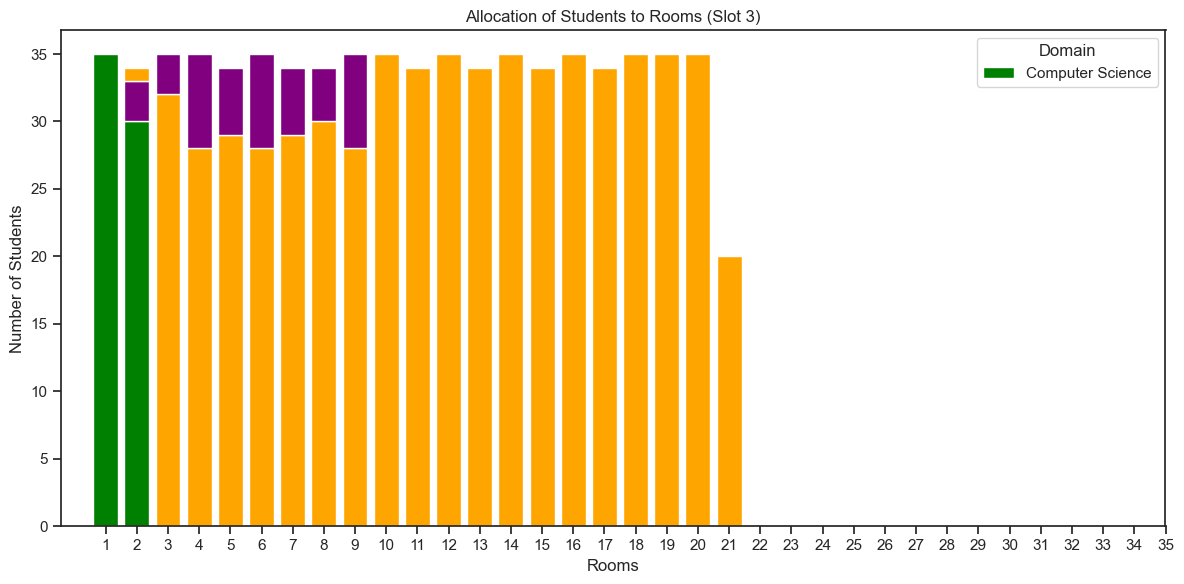

In [14]:
import matplotlib.pyplot as plt

# Remove trailing periods from domain names
data['domain'] = data['domain'].str.rstrip('.')

# Define colors for each domain
domain_colors = {
    'Software Engineering': 'skyblue',
    'Artificial Intelligence': 'orange',
    'Computer Science': 'green',
    'Business Analytics': 'red',
    'Electrical Engineering': 'purple'
}

# Plotting the bar plots for each slot
for slot in range(3):
    plt.figure(figsize=(12, 6))
    
    for i, room_slots in enumerate(allocated_rooms):
        room_students = room_slots[slot]
        domain_counts = data.loc[room_students, 'domain'].value_counts()
        bottom = 0
        for domain, count in domain_counts.items():
            plt.bar(i + 1, count, bottom=bottom, color=domain_colors[domain], label=domain if (i == 0) else None)
            bottom += count
    
    plt.xlabel('Rooms')
    plt.ylabel('Number of Students')
    plt.title(f'Allocation of Students to Rooms (Slot {slot + 1})')
    plt.legend(title='Domain', loc='upper right')
    plt.xticks(range(1, len(room_capacities) + 1))
    plt.tight_layout()
    plt.show()


In [15]:
empty_rooms = sum(1 for room_students in allocated_rooms if len(room_students) == 0)
print(f"Total number of empty rooms: {empty_rooms}")

Total number of empty rooms: 0


In [16]:
import pandas as pd

# Read the original Data.csv file
file_path = r'C:\Users\Lenovo\Desktop\AI LAB\smester_project\Q3\Data.csv'
data = pd.read_csv(file_path)

# Count total number of students from each domain
domain_counts_original = data['domain'].value_counts()

# Print the counts
print("Total number of students from each domain in the original dataset:")
print(domain_counts_original)


Total number of students from each domain in the original dataset:
Software Engineering       609
Artificial Intelligence    606
Computer Science           596
Business Analytics         592
Electrical Engineering     407
Electrical Engineering.    190
Name: domain, dtype: int64


In [17]:
import string
import random

#  faculty member names (A, B, C, ...)
faculty_members = [char for char in string.ascii_uppercase[:25]]  

# Shuffle faculty members
random.shuffle(faculty_members)


faculty_data = []
domains = ['Computer Science', 'Artificial Intelligence', 'Business Analytics', 'Software Engineering', 'Electrical Engineering'] 

# Assuming total number of students for each domain
total_students_per_domain = {
    'Computer Science': 596,
    'Artificial Intelligence': 606,
    'Business Analytics': 592,
    'Software Engineering': 609,
    'Electrical Engineering': 407
}

# Calculate number of faculty members needed for each domain
total_students = sum(total_students_per_domain.values())
faculty_needed_per_domain = {domain: int(total_students_per_domain[domain] / total_students * len(faculty_members)) for domain in domains}

# Assign faculty members to each domain
for domain, num_faculty_needed in faculty_needed_per_domain.items():
    for i in range(num_faculty_needed):
        faculty_data.append({'Faculty Name': faculty_members.pop(0), 'Domain': domain})


print("Faculty Member Data:")
print("--------------------")
i=int(1)
for faculty in faculty_data:
    i=i+1
    print(f"{faculty['Faculty Name']}: {faculty['Domain']}")
print("TOtal numbe rof faculty members: ",i)

Faculty Member Data:
--------------------
I: Computer Science
F: Computer Science
O: Computer Science
R: Computer Science
W: Computer Science
P: Artificial Intelligence
U: Artificial Intelligence
Y: Artificial Intelligence
D: Artificial Intelligence
N: Artificial Intelligence
V: Business Analytics
S: Business Analytics
J: Business Analytics
L: Business Analytics
E: Business Analytics
G: Software Engineering
X: Software Engineering
B: Software Engineering
M: Software Engineering
C: Software Engineering
A: Electrical Engineering
T: Electrical Engineering
H: Electrical Engineering
TOtal numbe rof faculty members:  24


In [18]:

import random

def allocate_faculty_to_rooms(data, allocated_rooms, faculty_data):
    faculty_allocations = []

    # Go over each room and each slot within the room
    for i, room_slots in enumerate(allocated_rooms):
        for slot_idx, cluster_students in enumerate(room_slots):
            print(f"Room {i+1}, Slot {slot_idx+1}:")

            # Get unique domains of students in the cluster
            unique_domains = set(data.loc[cluster_students, 'domain'])
            assigned_faculty = {domain: None for domain in unique_domains}

            # Assign faculty members to the cluster based on domain expertise
            for domain in unique_domains:
                # Filter faculty members by domain expertise
                available_faculty = [faculty for faculty in faculty_data if faculty['Domain'] == domain]

                # Randomly assign a faculty member to the cluster
                if available_faculty:
                    assigned_faculty[domain] = random.choice(available_faculty)

            faculty_allocations.append((i + 1, slot_idx + 1, assigned_faculty))


            for domain, faculty in assigned_faculty.items():
                if faculty:
                    print(f"Domain: {domain}, Faculty: {faculty['Faculty Name']}")
                else:
                    print(f"No faculty assigned for domain: {domain}")

            print()

    return faculty_allocations


faculty_allocations = allocate_faculty_to_rooms(data, allocated_rooms, faculty_data)


Room 1, Slot 1:
No faculty assigned for domain: Electrical Engineering.

Room 1, Slot 2:
Domain: Software Engineering, Faculty: G

Room 1, Slot 3:
Domain: Computer Science, Faculty: F

Room 2, Slot 1:
No faculty assigned for domain: Electrical Engineering.

Room 2, Slot 2:
Domain: Software Engineering, Faculty: M

Room 2, Slot 3:
Domain: Computer Science, Faculty: O
Domain: Artificial Intelligence, Faculty: P
No faculty assigned for domain: Electrical Engineering.

Room 3, Slot 1:
Domain: Electrical Engineering, Faculty: T

Room 3, Slot 2:
Domain: Software Engineering, Faculty: M

Room 3, Slot 3:
Domain: Artificial Intelligence, Faculty: U
No faculty assigned for domain: Electrical Engineering.

Room 4, Slot 1:
Domain: Electrical Engineering, Faculty: H

Room 4, Slot 2:
Domain: Software Engineering, Faculty: C

Room 4, Slot 3:
Domain: Artificial Intelligence, Faculty: Y
No faculty assigned for domain: Electrical Engineering.

Room 5, Slot 1:
Domain: Electrical Engineering, Faculty: H



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


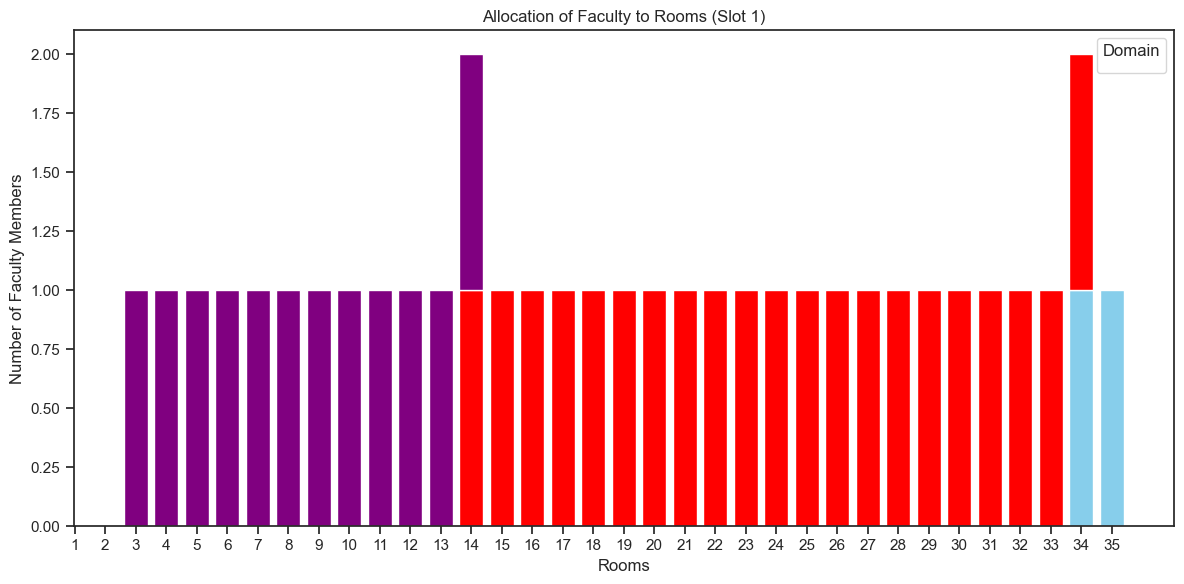

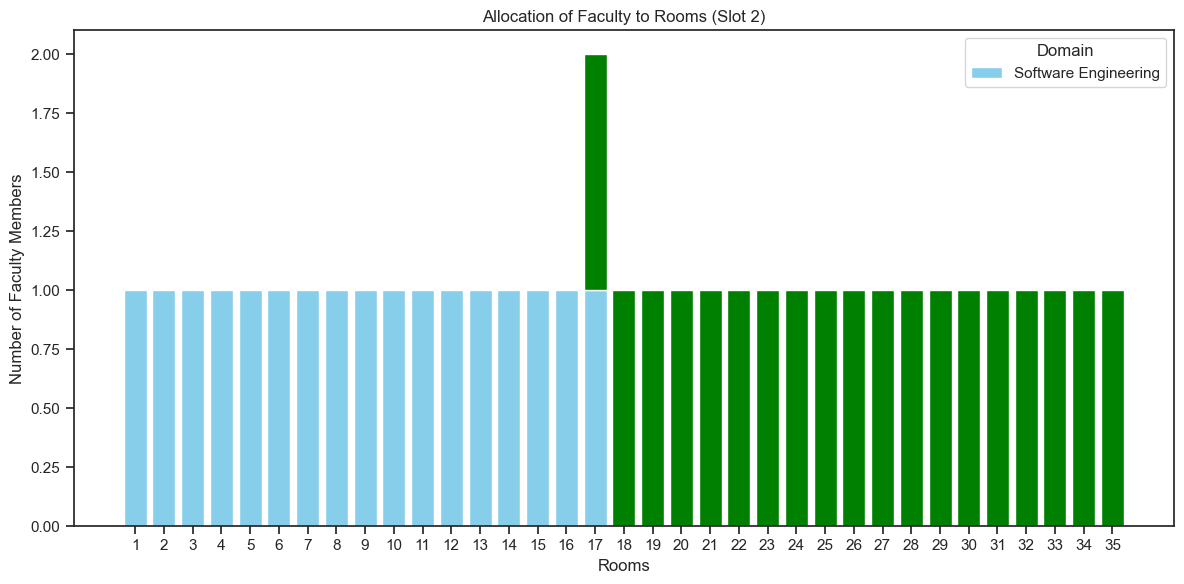

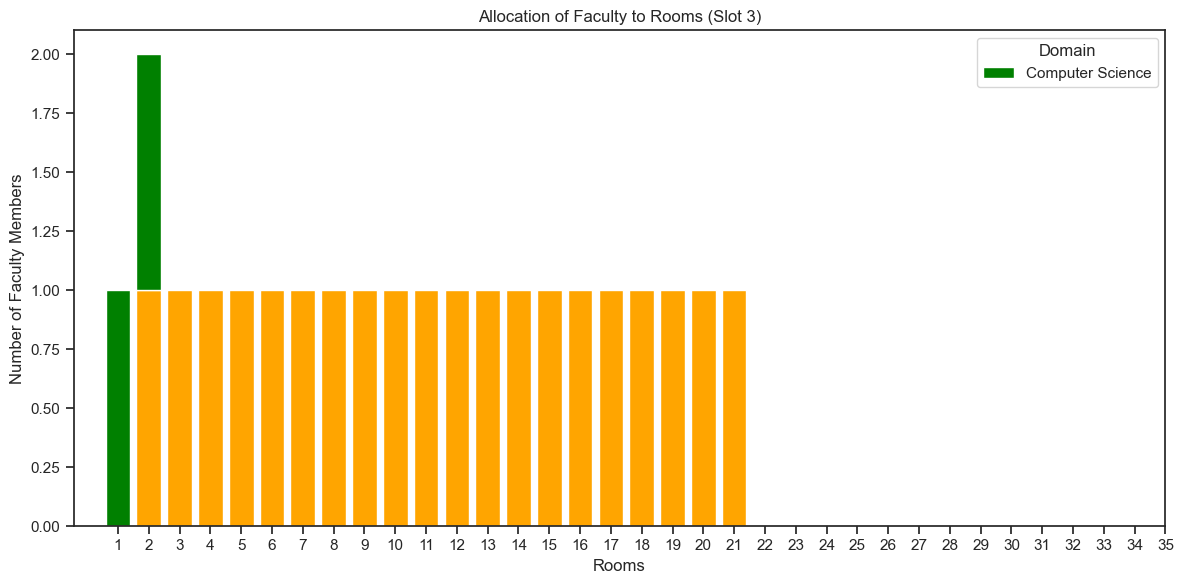

In [19]:
import matplotlib.pyplot as plt

domain_colors = {
    'Software Engineering': 'skyblue',
    'Artificial Intelligence': 'orange',
    'Computer Science': 'green',
    'Business Analytics': 'red',
    'Electrical Engineering': 'purple'
}

# Plotting the faculty allocation bar plots for each slot
for slot in range(3):
    plt.figure(figsize=(12, 6))
    faculty_count_per_room = {i + 1: {domain: 0 for domain in domain_colors.keys()} for i in range(len(room_capacities))}

    for room_number, slot_number, assigned_faculty in faculty_allocations:
        if slot_number == slot + 1:
            for domain, faculty in assigned_faculty.items():
                if faculty:
                    faculty_count_per_room[room_number][domain] += 1

    for room_number, domain_counts in faculty_count_per_room.items():
        bottom = 0
        for domain, count in domain_counts.items():
            if count > 0:
                plt.bar(room_number, count, bottom=bottom, color=domain_colors[domain], label=domain if (room_number == 1 and bottom == 0) else None)
                bottom += count

    plt.xlabel('Rooms')
    plt.ylabel('Number of Faculty Members')
    plt.title(f'Allocation of Faculty to Rooms (Slot {slot + 1})')
    plt.legend(title='Domain', loc='upper right')
    plt.xticks(range(1, len(room_capacities) + 1))
    plt.tight_layout()
    plt.show()
